In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/lclai/Desktop/LDIG/DB/training/combined_atom.csv')
print(df.shape)

(15667, 1298)


In [72]:
df.head()

,pubchem_id,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,25004,228.41,C15H32O,20.2,151.0,5.7,16,1,1,8,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-19.013763
1,25005,179.17,C6H13NO5,79.2,125.0,-1.2,12,2,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.161019
2,25006,116.20,C7H16O,20.2,52.3,2.2,8,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.376619
3,25009,190.28,C10H22O3,38.7,96.2,1.5,13,1,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.776438
4,25011,118.17,C6H14O2,18.5,45.8,0.7,8,0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.537140


In [73]:
y = df['Eat']
X1 = df.drop(['Eat','mf','pubchem_id'], axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X1)
X = pd.DataFrame(X, columns=X1.columns)

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [75]:
X_train

,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
3396,1.008830,0.181881,0.322745,0.042287,1.020973,-0.006349,0.178851,2.405353,1.009153,1.009153,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
9891,0.343092,0.668837,0.877682,0.275485,0.546650,-0.910584,0.767767,0.359247,0.343403,0.343403,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
8150,-1.528629,-0.153448,-1.334011,-1.181999,-1.824963,0.897886,-0.410065,-0.663806,-1.529636,-1.529636,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
14166,-1.861061,-0.850349,-1.513918,-0.540706,-1.824963,-0.006349,-0.998981,-0.152279,-1.861132,-1.861132,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
3172,0.676049,0.692164,0.886632,0.217185,0.783811,0.897886,0.178851,0.870774,0.676479,0.676479,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.359522,1.855610,1.056694,-3.455674,0.309489,1.802121,1.356683,0.359247,0.360335,0.360335,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
12252,1.323784,-0.095130,1.414718,-0.074311,1.495295,-0.006349,0.178851,-0.152279,1.324020,1.324020,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
1346,1.587178,-0.608329,0.868731,1.499771,1.495295,-0.910584,-0.410065,-0.152279,1.585888,1.585888,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955
11646,2.128997,-0.442123,1.540026,2.024465,2.443940,-0.006349,0.178851,0.359247,2.128164,2.128164,...,-0.110503,-0.049907,-0.049908,-0.049907,-0.089319,-0.049903,-0.049906,-0.066993,-0.049907,-0.049955


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

mode = XGBRegressor(eval_metric="rmse", random_state=123, n_jobs=-1)
para_distributions = {
            'n_estimators': [200],
            'max_depth': [5],
            'learning_rate': [0.1],
            'subsample': [0.8]
        }

rs = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=27, scoring='neg_mean_squared_error', verbose=3)
rs.fit(X_train, y_train.values.ravel())
print(rs.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.012 total time=  15.0s


c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

In [78]:
xgb_model = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.1, reg_lambda = 0, max_depth = 5, subsample = 0.8, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 200)

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Calcular RMSE para cada pliegue
rmse_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores)  # Convertir los puntajes negativos en RMSE

# Calcular la media y la desviación estándar del RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse}")
print(f"STD of RMSE: {std_rmse}")

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now depre

Mean RMSE: 0.08411773276968407
STD of RMSE: 0.0038772197611073407


c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:01:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


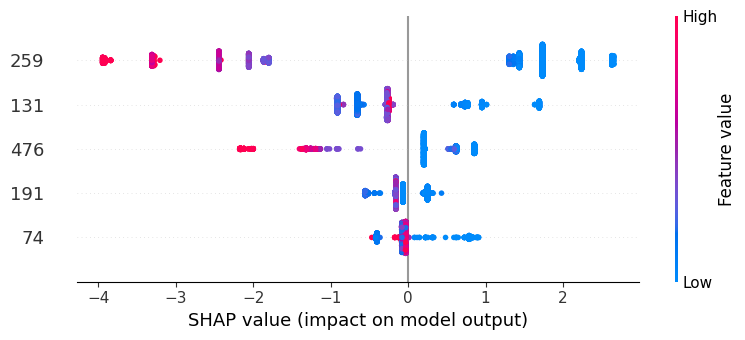

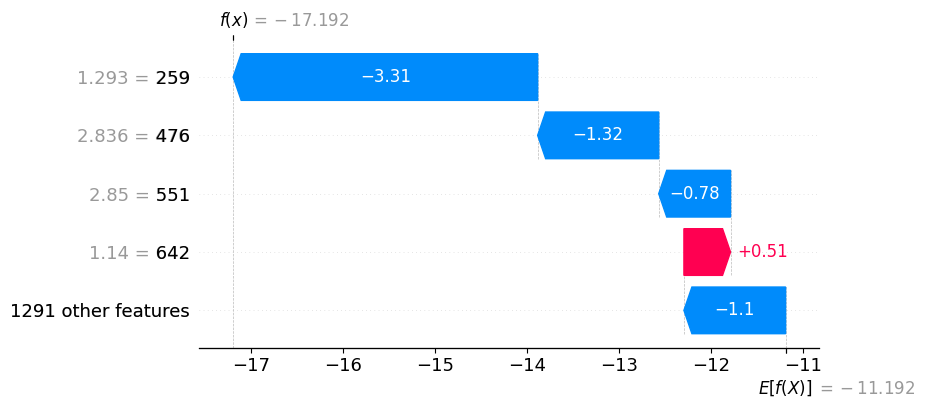

In [ ]:
import shap
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 1, reg_lambda = 0,
                         max_depth = 3, subsample = 1, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 200)
model.fit(X_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot de resumen para todas las características
shap.summary_plot(shap_values, X_test, max_display=5)
# Plot de valores de SHAP para una muestra
shap.plots.waterfall(shap_values[0], max_display=5)